In [27]:
import networkx as nx
import math
import matplotlib.pyplot as plt


In [28]:
G = nx.Graph()
print(type(G.nodes()))
print(type(G.edges()))

<class 'networkx.classes.reportviews.NodeView'>
<class 'networkx.classes.reportviews.EdgeView'>


In [29]:
#G.add_node(1, time='5pm')
#G.add_edge(1, 2, weight=4.7 )
#

In [30]:
#List of nodes and edges with properties:
nodes = {"S": (3,5), "P1": (10,8), "P2": (11,3), 
        "P3": (14,7), "P4": (15,1), "P5": (18,5),
        "P": (22,2), "E1": (26,4), "E2": (35,8), 
        "E3": (26,9), "E4": (28, 13), "E5": (19,9),
        "E": (19,13), "D1": (21, 15), "D2": (24,17),
        "D3": (30,15), "D4": (34, 17), "D5": (46,15),
        "D": (38, 14), "C1": (42, 13), "C2": (41, 2),
        "C3": (46, 9), "C4": (48, 3), "C5": (51, 14),
        "C": (54, 8)}
edges = [["S","P1"], ["S","P2"], ["P1","P3"], ["P3","P5"], 
         ["P5", "P"], ["P2","P5"], ["P2","P4"],["P4","P"],
        ["P","E1"], ["P","E3"], ["E3","E5"], ["E5","E"], ["E3","E4"],
         ["E1","E2"],[ "E2","E4"], ["E4", "E"], ["E","D1"],
         ["D1","D2"], ["D2","D3"], ["D2","D4"], ["D4","D5"],
         ["D5", "D"], ["D3","D"], ["D","C1"],
         ["C1","C5"], ["C1", "C2"], ["C5", "C"], ["C2", "C4"],
         ["C2","C3"], ["C4", "C"], ["C3", "C"]
        ]

In [31]:
edges_w = []

In [32]:
#calculate distance between two points
def pyth(x,y):
    return math.sqrt(x**2 + y**2)

#tuple of edges with weights
def edge_w(edge,node_list=nodes):
    return (edge[0], edge[1], {"weight": round(pyth(abs(
        node_list[edge[0]][0]-node_list[edge[1]][0]),
         abs(node_list[edge[0]][1]-node_list[edge[1]][1])),1000)})

In [33]:
#Adding the nodes to the graph
for index, value in nodes.items():
    G.add_node(index, cords=value)

In [34]:
#make list of edges with weights
edges_weights = [edge_w(edge, nodes) for edge in edges]
print(edges_weights)    

[('S', 'P1', {'weight': 7.615773105863909}), ('S', 'P2', {'weight': 8.246211251235321}), ('P1', 'P3', {'weight': 4.123105625617661}), ('P3', 'P5', {'weight': 4.47213595499958}), ('P5', 'P', {'weight': 5.0}), ('P2', 'P5', {'weight': 7.280109889280518}), ('P2', 'P4', {'weight': 4.47213595499958}), ('P4', 'P', {'weight': 7.0710678118654755}), ('P', 'E1', {'weight': 4.47213595499958}), ('P', 'E3', {'weight': 8.06225774829855}), ('E3', 'E5', {'weight': 7.0}), ('E5', 'E', {'weight': 4.0}), ('E3', 'E4', {'weight': 4.47213595499958}), ('E1', 'E2', {'weight': 9.848857801796104}), ('E2', 'E4', {'weight': 8.602325267042627}), ('E4', 'E', {'weight': 9.0}), ('E', 'D1', {'weight': 2.8284271247461903}), ('D1', 'D2', {'weight': 3.605551275463989}), ('D2', 'D3', {'weight': 6.324555320336759}), ('D2', 'D4', {'weight': 10.0}), ('D4', 'D5', {'weight': 12.165525060596439}), ('D5', 'D', {'weight': 8.06225774829855}), ('D3', 'D', {'weight': 8.06225774829855}), ('D', 'C1', {'weight': 4.123105625617661}), ('C1

In [35]:
#Adding the edges to the graph
for edge in edges_weights:
    G.add_edge(edge[0],edge[1], weight=edge[2]["weight"])

In [36]:
#Target and sourve location
source = "S"
target = "C"

In [67]:
#Calculate the shortest path
path = nx.shortest_path(G, source, target, method='dijkstra',weight="weight")
length2 = nx.shortest_path_length(G, source, target, method='dijkstra')


In [68]:
#Calculate the shortest path
length = 0
for point in path:
    if point == "S":
        prev_point = point
        pass
    else:
      
        length += G.edges[prev_point, point]["weight"]  
        prev_point = point

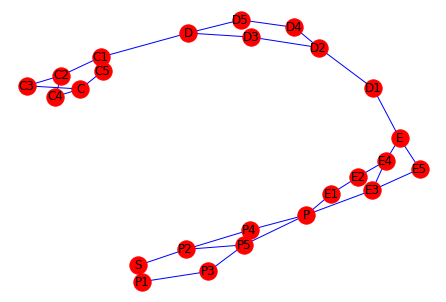

In [69]:
#drawing the path
nx.draw(G, node_color='r', edge_color='b',with_labels=True)


In [70]:
length2

13

In [71]:
G.edges["C1","C2"]["weight"]

11.045361017187261

In [72]:
#Solution
length

79.55915893149887